In [1]:
import numpy as np
import astropy
import astropy.units as ur
import astropy.constants as cr
%matplotlib inline
from tdsat_sensitivity import src_rate, bgd_rate, find_limit, compute_snr
import matplotlib.pyplot as plt


In [36]:
td1_band = [180, 220]*ur.nm
td2_band = [260, 300]*ur.nm
td3_band = [340, 380]*ur.nm

snr_limit = 10
exposure = 300*ur.s
diameter=30*ur.cm
psf_size = 10*ur.arcsec
efficiency = 0.9
Area_Tel = np.pi*(0.5*diameter)**2

qe = 0.8

# For the ABmag where you hit a 10-sigma detection
maglimit = find_limit(td1_band,snr_limit,snr_diag=True,bgd_diag=False, 
                      high_zodi=True, diameter=diameter, exposure=exposure,
                      psf_size=psf_size, efficiency=efficiency, qe = qe)
print(maglimit)


# Now get the SNR for a ABmag 22 source:
# snr = compute_snr(td2_band,22*ur.ABmag,
#                   high_zodi=False,diameter=diameter,
#                   efficiency = efficiency,exposure=exposure,
#                   qe = qe, psf_size = psf_size, diag=False)



SNR Computation
Inputs: 
Exposure 300.0 s
Efficiency 0.9
Optics Diameter: 30.0 cm
PSF Size: 10.0 arcsec

Outputs:
Source Counts: 346.4128184082678
Background Counts: 1051.2535077215907
Magnitude limit: 22.3 mag(AB)
Signal to noise ratio: 9.265998019151702

22.3 mag(AB)


In [28]:
diameter = 35*ur.cm
effArea = []
psf_req = []
for eff in np.arange(10)/20.:
    efficiency = (0.9 - eff)
    area = efficiency*np.pi * (0.5*diameter)**2
    psf_array = (15 - np.arange(15))
    psf_array = np.append(psf_array, 0.01)
    found = False
    for psf in psf_array:
        psf_size = psf*ur.arcsec
        
        snr = compute_snr(td2_band,22*ur.ABmag, high_zodi=True,diameter=diameter,
                          efficiency = efficiency, qe = qe, psf_size = psf_size)
        print(psf_size, snr)
        if (snr <= 10.) or (np.isnan(snr)):
            found = True
            break
        else:
            last_psf = psf
        last_psf = psf
    if found:
        psf_req.append(last_psf)
        print(efficiency, area, last_psf, snr)


    else:
        psf_req.append(0.)
        print(efficiency, area, 0., snr)


    effArea.append(area.value)
 
    



15.0 arcsec 1.0363559161788733
0.9 865.9014751456867 cm2 0 1.0363559161788733
15.0 arcsec 1.0071569155295566
0.85 817.795837637593 cm2 0 1.0071569155295566
15.0 arcsec 0.9770857280705046
0.8 769.6902001294993 cm2 0 0.9770857280705046
15.0 arcsec 0.9460591881585034
0.75 721.5845626214056 cm2 0 0.9460591881585034
15.0 arcsec 0.9139800079865996
0.7 673.4789251133119 cm2 0 0.9139800079865996
15.0 arcsec 0.8807331732705672
0.65 625.3732876052181 cm2 0 0.8807331732705672
15.0 arcsec 0.8461810621842711
0.6 577.2676500971246 cm2 0 0.8461810621842711
15.0 arcsec 0.8101566870052729
0.55 529.1620125890308 cm2 0 0.8101566870052729
15.0 arcsec 0.7724540924866783
0.5 481.0563750809371 cm2 0 0.7724540924866783
15.0 arcsec 0.7328142960528786
0.45 432.95073757284337 cm2 0 0.7328142960528786


<Quantity 0.7328142960528786>

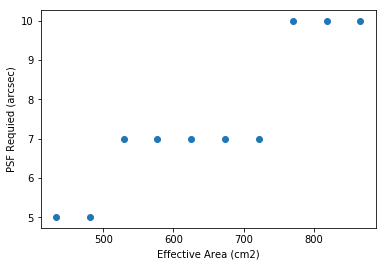

In [8]:
# f = plt.figure()

plt.scatter(effArea, psf_req)
plt.ylabel('PSF Requied (arcsec)')
plt.xlabel('Effective Area (cm2)')
plt.show()



In [ ]:
area_val

In [ ]:
# Do a PSF scan over TD3 band


f = plt.figure()
for efficiency in [0.8, 0.7, 0.6, 0.5]:
    diameter_array = [40, 38,36,34, 32, 30, 27, 24]
    psf_req = []
    
    
    for d in diameter_array:
        diameter = d*ur.cm
        psf_array = [20, 17, 15, 12, 10, 5, 2, 1]
        found = False
        for psf in psf_array:
            psf_size = psf*ur.arcsec

            maglimit = find_limit(td3_band,snr_limit,snr_diag=False,bgd_diag=False, 
                           medi_zodi=True, diameter=diameter, exposure=exposure,
                            psf_size=psf_size, efficiency=efficiency, qe = qe)
            if maglimit.value >= 22:
                found = True
                break
        if found:
            psf_req.append(psf)
        else:
            psf_req.append(0.)
            
        
    plt.scatter(diameter_array, psf_req, label = '{} system efficiency'.format(efficiency))

    
#    plt.plot(diameter_array, psf_req, label = '{} system efficiency'.format(efficiency))

plt.title('High Zodiacal Background, 10-σ in 300 s, U-band')
plt.xlabel('Pupil Diameter (cm)')
plt.ylabel('PSF Size (arsec)')
plt.ylim([0, 25])
plt.legend(loc='upper left')
plt.show()
plt.show()
f.savefig("medium_background_requirements_to22.pdf", bbox_inches='tight')

In [ ]:
# Do a PSF scan over TD2 band


f = plt.figure()
for efficiency in [0.8, 0.7, 0.6, 0.5]:
    diameter_array = [40, 38,36,34, 32, 30, 27, 24]
    psf_req = []
    
    for d in diameter_array:
        diameter = d*ur.cm
        psf_array = [5, 4, 3, 2, 1]
        found = False
        for psf in psf_array:
            psf_size = psf*ur.arcsec

            maglimit = find_limit(td2_band,snr_limit,snr_diag=False,bgd_diag=False, 
                           high_zodi=True, diameter=diameter, exposure=exposure,
                            psf_size=psf_size, efficiency=efficiency, qe = qe)
            if maglimit.value >= 22:
                found = True
                break
        if found:
            psf_req.append(psf)
        else:
            psf_req.append(0.)
            
        
    plt.scatter(diameter_array, psf_req, label = '{} system efficiency'.format(efficiency))

    
#    plt.plot(diameter_array, psf_req, label = '{} system efficiency'.format(efficiency))

plt.title('High Zodiacal Background, 10-σ in 300 s, U-band')
plt.xlabel('Pupil Diameter (cm)')
plt.ylabel('PSF Size (arsec)')
plt.ylim([0, 6])
plt.legend(loc='upper left')
plt.show()
plt.show()
f.savefig("high_background_TD2_requirements_to22.pdf", bbox_inches='tight')

In [14]:
x = (10 - np.arange(10))

In [15]:
x

array([10,  9,  8,  7,  6,  5,  4,  3,  2,  1])